In [ ]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn tensorflow transformers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf
from transformers import BertTokenizer, BertModel
import torch

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv('test.csv')

# Display the first few rows of the dataset
print(df.head())


                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from me because i do...      0
3  i left with my bouquet of red and yellow tulip...      1
4    i was feeling a little vain when i did this one      0


In [ ]:
print(df.columns)


Index(['text', 'label'], dtype='object')


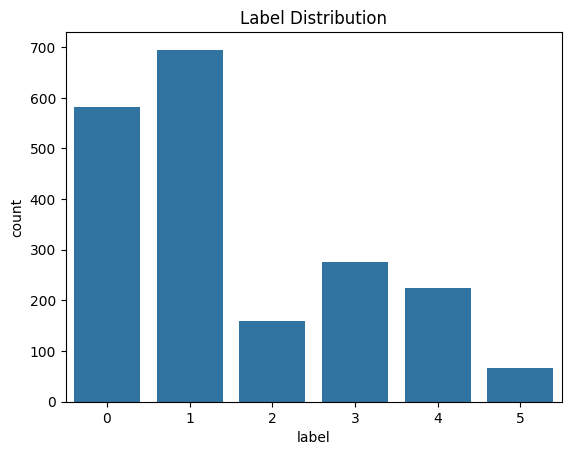

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize label distribution
sns.countplot(x='label', data=df)
plt.title("Label Distribution")
plt.show()


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase and remove special characters
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize, remove stopwords, and lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.52      0.61       124
           1       0.50      0.93      0.65       131
           2       0.83      0.14      0.24        35
           3       0.79      0.37      0.50        52
           4       0.75      0.56      0.64        43
           5       1.00      0.20      0.33        15

    accuracy                           0.59       400
   macro avg       0.77      0.45      0.50       400
weighted avg       0.68      0.59      0.57       400



In [ ]:
label_map = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise',
    6: 'disgust',
    7:'neutral',
}


In [ ]:
df['predicted_label'] = model.predict(vectorizer.transform(df['clean_text']))
df['predicted_emotion'] = df['predicted_label'].map(label_map)
print(df[['text', 'predicted_emotion']].head())


                                                text predicted_emotion
0  im feeling rather rotten so im not very ambiti...           sadness
1          im updating my blog because i feel shitty           sadness
2  i never make her separate from me because i do...           sadness
3  i left with my bouquet of red and yellow tulip...               joy
4    i was feeling a little vain when i did this one           sadness


In [ ]:
import joblib

joblib.dump(model, 'emotion_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
def predict_emotion(text):
    cleaned = preprocess(text)
    vec = vectorizer.transform([cleaned])
    label = model.predict(vec)[0]
    return label_map[label]

# Example
print(predict_emotion("iam feeling haappy today"))


joy
